---
title: BookBinders Logistic Regression using `pyrsm`
author: 
    name: Professor Vincent Nijs
    affiliation: Rady School of Management
format:
    html:
        code-tools: true
        code-fold: true
        toc: true
        embed-resources: true
        highlight: "zenburn"
        theme: "cosmo"
        includes:
            in_header: figures/icon-header.html
---

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import polars as pl
import pyrsm as rsm
import seaborn as sns

# increase plot resolution
mpl.rcParams["figure.dpi"] = 100

# get version of pyrsm 0.9.13 or higher
# pip install --user "pyrsm>=0.9.12"

rsm.__version__

ModuleNotFoundError: No module named 'pyrsm.radiant.data'

In [ ]:
rsm.__file__

'/Users/vnijs/gh/pyrsm/pyrsm/__init__.py'

In [ ]:
## setup pyrsm for autoreload
%reload_ext autoreload
%autoreload 2
%aimport pyrsm

In [ ]:
# load data
bbb = pd.read_parquet("data/bbb.parquet")

In [ ]:
bbb.dtypes

acctnum        object
gender       category
state        category
zip            object
zip3           object
first           int32
last            int32
book            int32
nonbook         int32
total           int32
purch           int32
child           int32
youth           int32
cook            int32
do_it           int32
reference       int32
art             int32
geog            int32
buyer        category
training        int32
dtype: object

In [ ]:
rsm.md("data/bbb_description.md")

# BookBinders Book Club

Information on purchasing history and demographics for 50,000 of the BookBinders Book Club's customers'. Variables included in the dataset are described below

## Variables

* acctnum: Customer account number
* gender: Customer gender identity (M = male, F = female, O = Other or unknown)
* state: State where customer lives (2-character abbreviation)
* zip: ZIP code (5-digit)
* zip3: First 3 digits of ZIP code
* first: Number of months since first purchase
* last: Number of months since most recent purchase
* book: Total dollars spent on books
* nonbook: Total dollars spent on non-book products
* total: Total dollars spent
* purch: Total number of books purchased
* child: Total number of children's books purchased
* youth: Total number of youth books purchased
* cook: Total number of cook books purchased 
* do_it: Total number of do-it-yourself books purchased 
* reference: Total number of reference books purchased 
* art: Total number of art books purchased 
* geog: Total number of geography books purchased 
* buyer: Did the customer buy The Art History of Florence?  (yes, no)
* training: Dummy variable that splits the dataset into a training (1) and validation (0) dataset


No plot will be created for acctnum (type object)
No plot will be created for zip (type object)
No plot will be created for zip3 (type object)


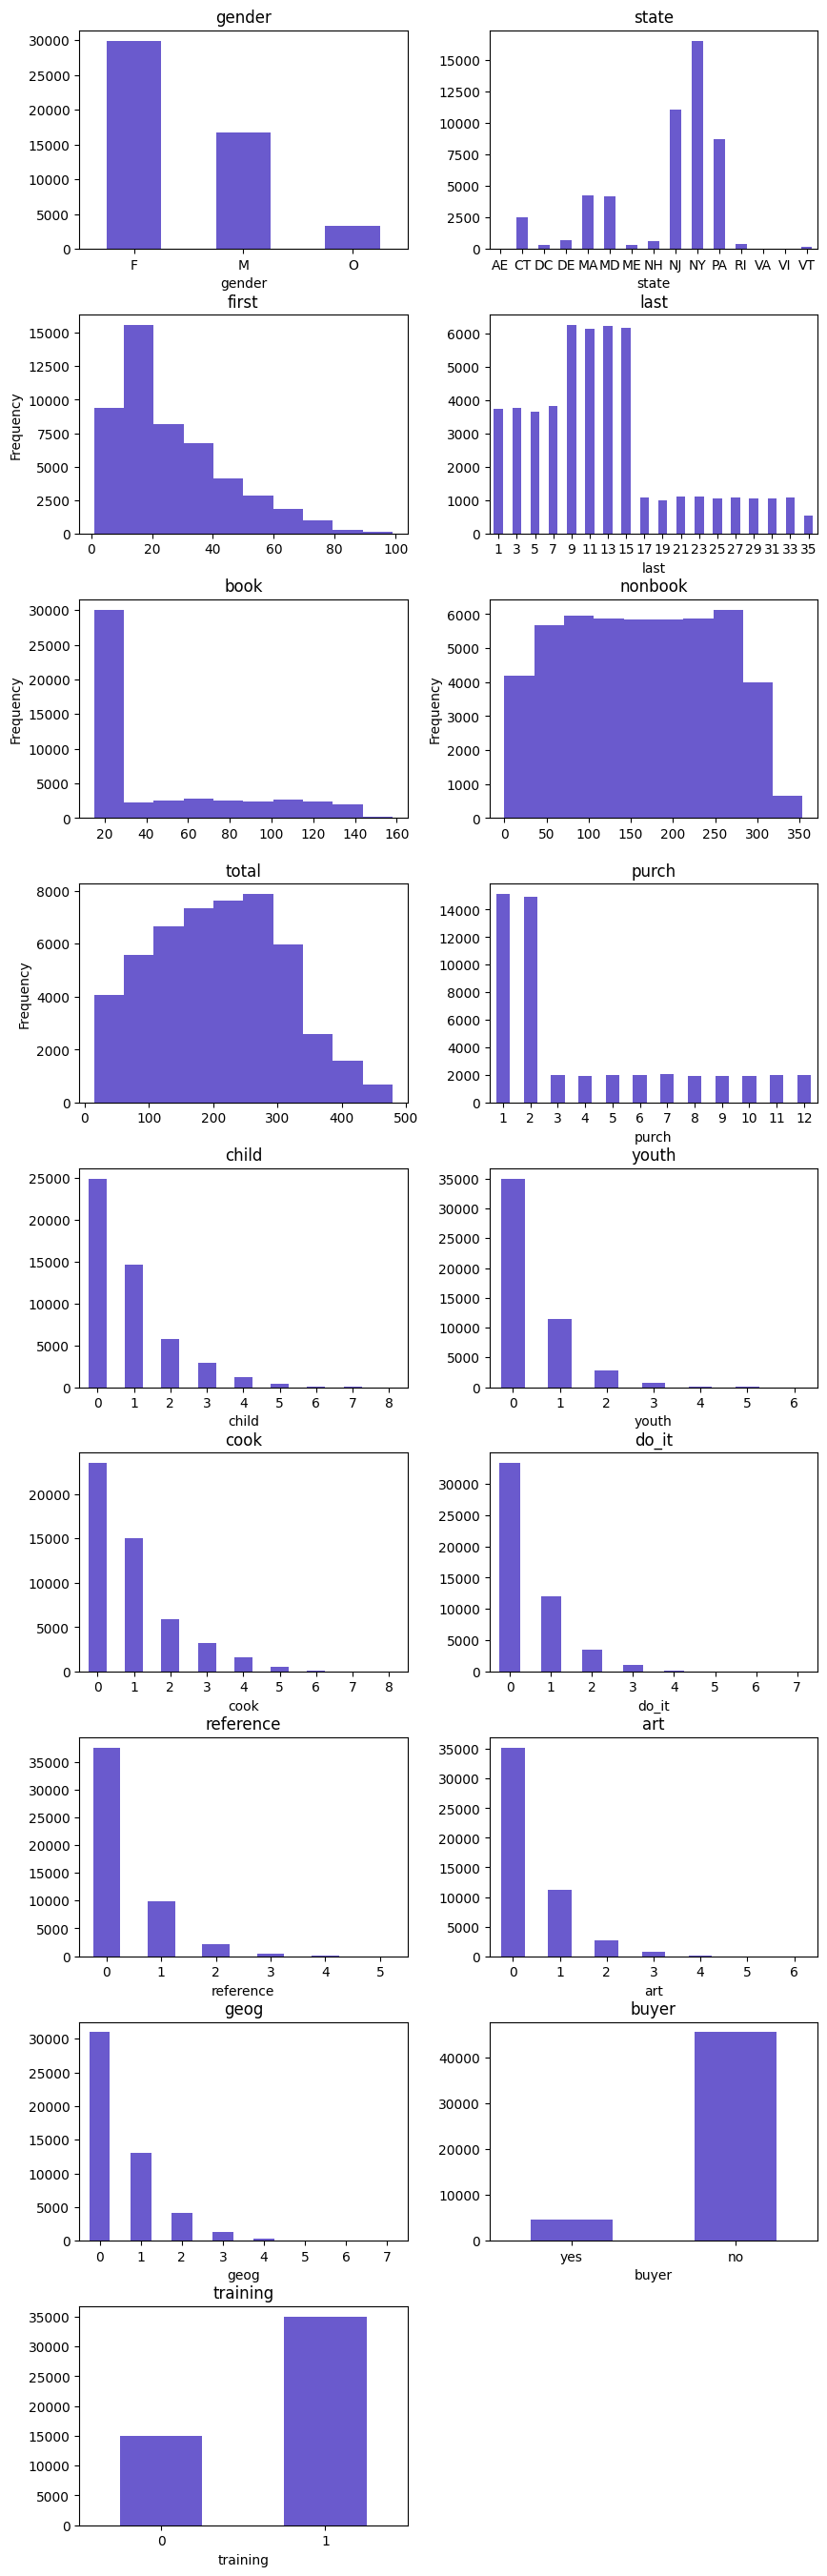

In [ ]:
rsm.distr_plot(bbb)

In [ ]:
lr = rsm.model.logistic(
    data={"bbb": bbb},
    rvar="buyer",
    lev="yes",
    evar=[
        "gender",
        "last",
        "total",
        "child",
        "youth",
        "cook",
        "do_it",
        "reference",
        "art",
        "geog",
    ],
)
lr.summary()

Logistic regression (GLM)
Data                 : bbb
Response variable    : buyer
Level                : yes
Explanatory variables: gender, last, total, child, youth, cook, do_it, reference, art, geog
Null hyp.: There is no effect of x on buyer
Alt. hyp.: There is an effect of x on buyer

              OR     OR%  coefficient  std.error  z.value p.value     
Intercept  0.093  -90.7%        -2.37      0.050  -47.518  < .001  ***
gender[M]  2.165  116.5%         0.77      0.037   21.065  < .001  ***
gender[O]  1.118   11.8%         0.11      0.074    1.507   0.132     
last       0.910   -9.0%        -0.09      0.003  -33.916  < .001  ***
total      1.001    0.1%         0.00      0.000    5.626  < .001  ***
child      0.830  -17.0%        -0.19      0.017  -10.759  < .001  ***
youth      0.893  -10.7%        -0.11      0.026   -4.332  < .001  ***
cook       0.763  -23.7%        -0.27      0.017  -15.778  < .001  ***
do_it      0.583  -41.7%        -0.54      0.027  -19.992  < .001  ***


In [ ]:
lr.summary(main=False, fit=True)


Pseudo R-squared (McFadden): 0.205
Pseudo R-squared (McFadden adjusted): 0.205
Area under the RO Curve (AUC): 0.812
Log-likelihood: -12059.992, AIC: 24143.985, BIC: 24249.822
Chi-squared: 6235.48, df(11), p.value < 0.001 
Nr obs: 50,000


In [ ]:
lr.summary(main=False, fit=False, vif=True)


Variance inflation factors:

             vif    Rsq
total      1.362  0.266
cook       1.309  0.236
child      1.287  0.223
do_it      1.246  0.198
geog       1.197  0.164
youth      1.144  0.126
art        1.141  0.124
reference  1.117  0.105
gender     1.102  0.093
last       1.000  0.000


In [ ]:
lr.summary(main=False, fit=False, ci=True)


Confidence intervals:

                OR     OR%   2.5%  97.5% p.values     
gender[T.M]  2.165  116.5%  2.015  2.327   < .001  ***
gender[T.O]  1.118   11.8%  0.967  1.292    0.132     
last         0.910   -9.0%  0.905  0.915   < .001  ***
total        1.001    0.1%  1.001  1.002   < .001  ***
child        0.830  -17.0%  0.803  0.859   < .001  ***
youth        0.893  -10.7%  0.849  0.940   < .001  ***
cook         0.763  -23.7%  0.738  0.789   < .001  ***
do_it        0.583  -41.7%  0.553  0.615   < .001  ***
reference    1.264   26.4%  1.200  1.332   < .001  ***
art          3.177  217.7%  3.042  3.317   < .001  ***
geog         1.775   77.5%  1.711  1.841   < .001  ***


### Generate the permutation importance graph

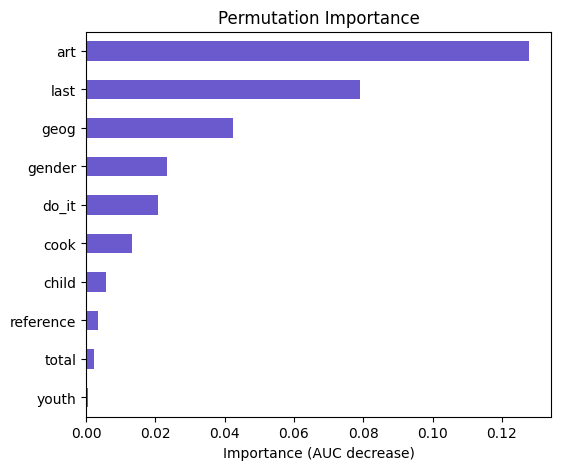

In [ ]:
lr.plot("vimp")

### Generate Prediction Plots (similar to Partial Dependence plots)


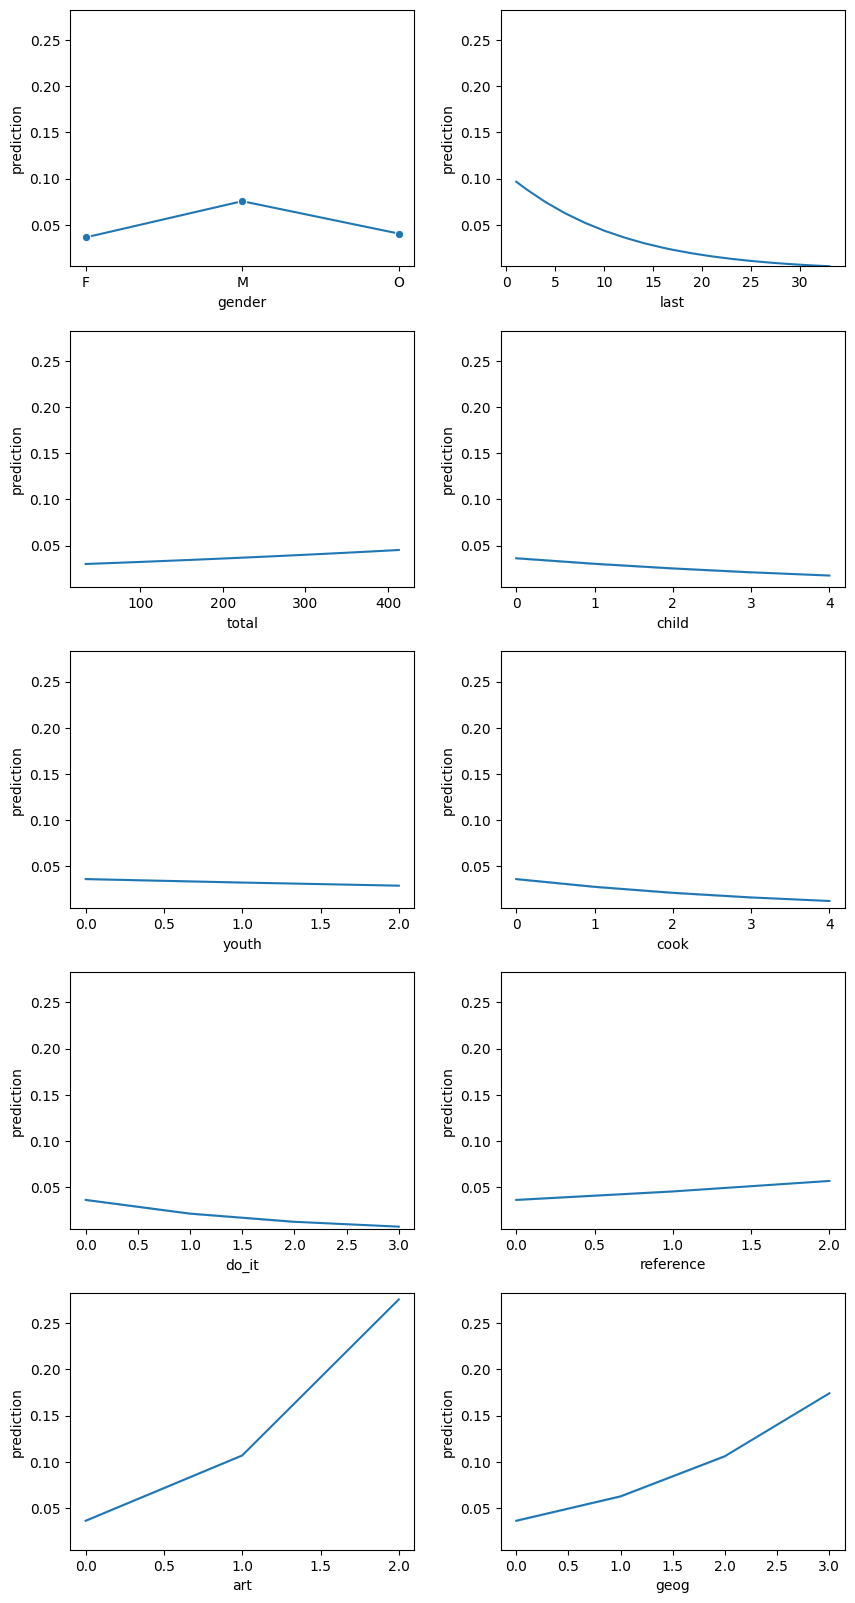

In [ ]:
lr.plot("pred")

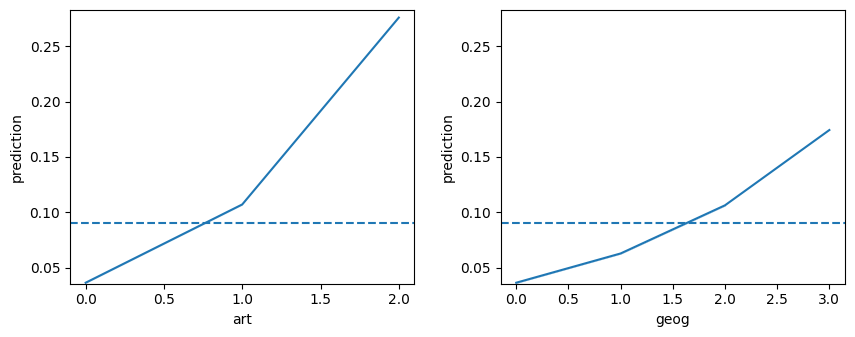

In [ ]:
lr.plot("pred", incl=["art", "geog"], hline=True)

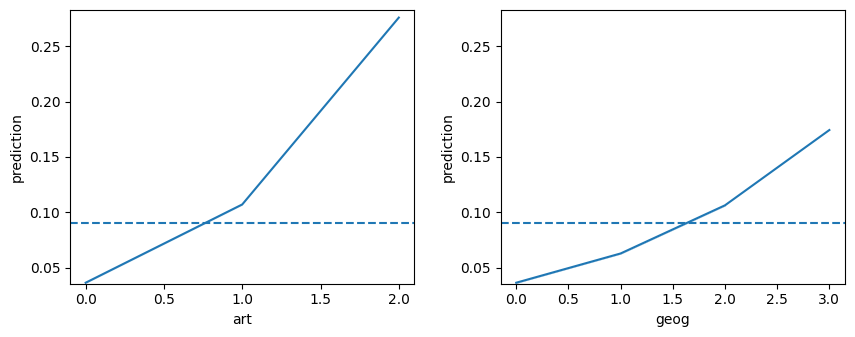

In [ ]:
lr.plot("pred", incl=["art", "geog"], hline=True, minq=0.025, maxq=0.975)

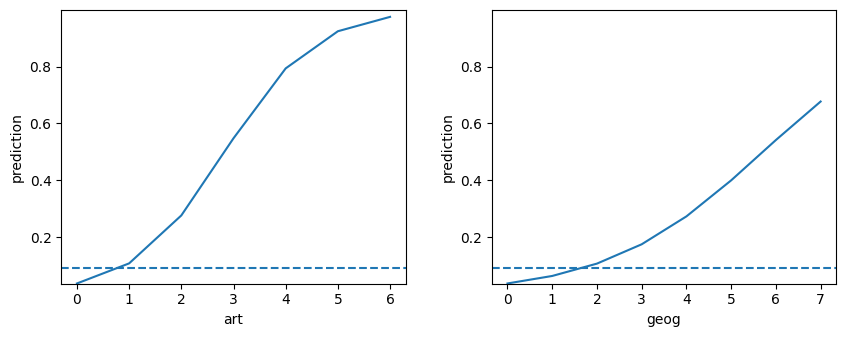

In [ ]:
lr.plot("pred", incl=["art", "geog"], hline=True, minq=0, maxq=1)

In [ ]:
bbb.art.value_counts()

art
0    35221
1    11224
2     2738
3      691
4      108
5       17
6        1
Name: count, dtype: int64

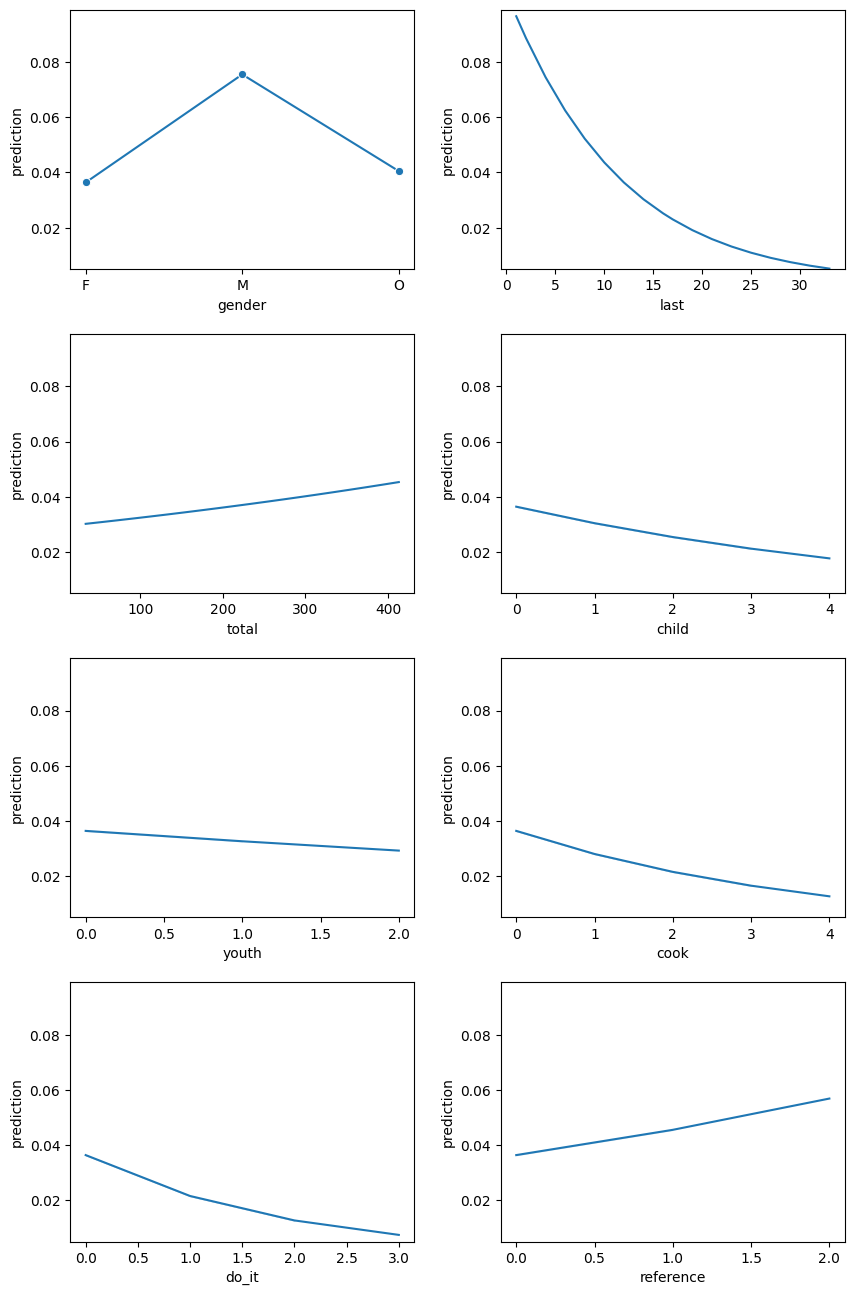

In [ ]:
lr.plot("pred", excl=["art", "geog"])

### Generate predictions

In [ ]:
lr.predict()

,gender,last,total,child,youth,cook,do_it,reference,art,geog,prediction
0,M,29,357,3,2,2,0,1,0,2,0.020013
1,M,27,138,0,1,0,1,0,0,1,0.016599
2,F,15,172,0,0,2,0,0,0,0,0.015646
3,F,7,272,0,0,0,0,1,0,0,0.076021
4,F,15,149,0,0,1,0,0,0,0,0.019896
...,...,...,...,...,...,...,...,...,...,...,...
49995,F,9,27,1,0,0,0,0,0,0,0.032909
49996,F,5,373,3,0,1,1,0,1,1,0.112295
49997,M,3,193,0,0,0,0,1,0,0,0.192425
49998,M,29,344,2,0,1,0,2,1,2,0.137861


In [ ]:
lr.predict(data=bbb[300:400])

,gender,last,total,child,youth,cook,do_it,reference,art,geog,prediction
300,M,11,357,2,4,2,2,0,2,0,0.085107
301,M,11,147,0,1,0,0,0,0,0,0.069734
302,F,15,107,0,1,0,0,0,0,0,0.022165
303,F,7,372,3,1,1,1,1,2,2,0.399554
304,M,9,235,0,1,0,0,0,0,0,0.090857
...,...,...,...,...,...,...,...,...,...,...,...
395,F,15,265,0,1,0,0,0,0,0,0.026323
396,F,7,254,0,1,0,1,0,0,0,0.032163
397,M,3,322,1,0,0,0,1,0,0,0.185970
398,F,19,169,0,0,1,0,0,0,0,0.014012


In [ ]:
bbb["pred_logit"] = lr.predict()["prediction"]
bbb["pred_logit"].head()

0    0.020013
1    0.016599
2    0.015646
3    0.076021
4    0.019896
Name: pred_logit, dtype: float64

In [ ]:
bbb["pred_logit"] = lr.predict(data=bbb)["prediction"]
bbb["pred_logit"].head()

0    0.020013
1    0.016599
2    0.015646
3    0.076021
4    0.019896
Name: pred_logit, dtype: float64

In [ ]:
bbb.head()

,acctnum,gender,state,zip,zip3,first,last,book,nonbook,total,...,child,youth,cook,do_it,reference,art,geog,buyer,training,pred_logit
0,10001,M,NY,10605,106,49,29,109,248,357,...,3,2,2,0,1,0,2,no,1,0.020013
1,10002,M,NY,10960,109,39,27,35,103,138,...,0,1,0,1,0,0,1,no,1,0.016599
2,10003,F,PA,19146,191,19,15,25,147,172,...,0,0,2,0,0,0,0,no,0,0.015646
3,10004,F,NJ,07016,070,7,7,15,257,272,...,0,0,0,0,1,0,0,no,0,0.076021
4,10005,F,NY,10804,108,15,15,15,134,149,...,0,0,1,0,0,0,0,no,1,0.019896


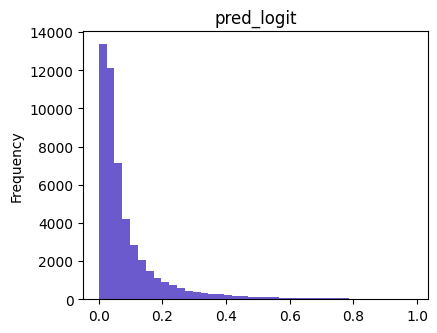

In [ ]:
rsm.distr_plot(bbb.pred_logit, bins=40)


Tip: Format all code in your notebooks. Click in a code cell and choose "Format Cell" or "Format Notebook"

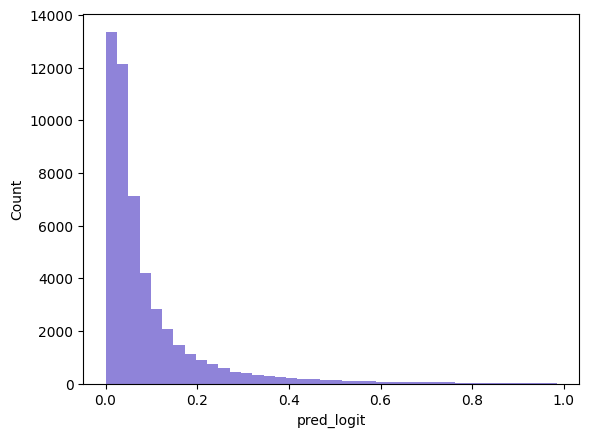

In [ ]:
fig = sns.histplot(bbb.pred_logit, bins=40, color="slateblue", kde=False, edgecolor="none")

### Using the Radiant interface to generate the required code

In [ ]:
rsm.radiant.logistic({"bbb": bbb})

Listening on http://0.0.0.0:8000
Pyrsm and Radiant are open source tools and free to use. If you
are a student or instructor using pyrsm or Radiant for a class,
as a favor to the developers, please send an email to
<radiant@rady.ucsd.edu> with the name of the school and class.
If you are using Radiant in your company, as a favor to the
developer, please share the name of your company and what types
of activites you are supporting with the tool.


```python
import pyrsm as rsm

# bbb = pd.read_parquet('bbb.parquet')
lr = rsm.model.logistic(
    data={"bbb": bbb},
    rvar="buyer",
    lev="no",
    evar=[
        "gender",
        "last",
        "total",
        "child",
        "youth",
        "cook",
        "do_it",
        "reference",
        "art",
        "geog",
    ],
)
lr.summary()

```

## Profitability Analysis

In [ ]:
breakeven = 0.5 / (18 - 9 - 3)

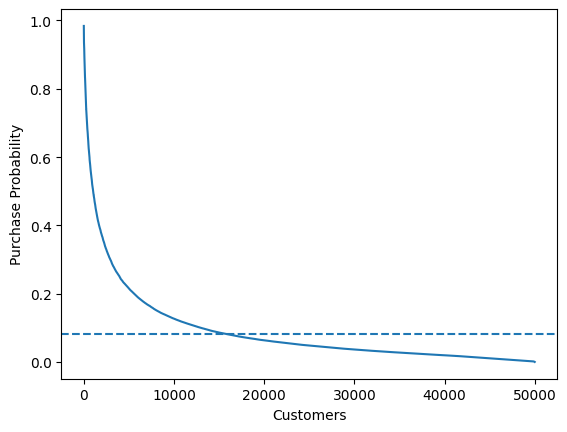

In [ ]:
ax = sns.lineplot(y=bbb.pred_logit.sort_values(ascending=False), x=np.arange(bbb.shape[0]))
ax.set(ylabel="Purchase Probability")
ax.set(xlabel="Customers")
ax.axhline(breakeven, ls="--")
plt.show()

In [ ]:
# why you might prefer to use observed=False when doing a groupby
# will show all classes, even they are not present in the section of data
# you are looking at
# bbb.buyer = pd.Categorical(rsm.ifelse(bbb.buyer == "no", "yes", bbb.buyer), categories=["yes", "no"])

In [ ]:
ncust = bbb.groupby("buyer", observed=False).buyer.agg("count")
pd.DataFrame(
    {
        "n_obs": ncust,
        "perc": ncust.agg(lambda x: 100 * (x / x.sum())).round(2).astype("str") + "%",
    }
)

,n_obs,perc
buyer,,
yes,4522,9.04%
no,45478,90.96%


In [ ]:
bbb["mailto_logit"] = bbb.pred_logit > breakeven
bbb[300:310]


,acctnum,gender,state,zip,zip3,first,last,book,nonbook,total,...,youth,cook,do_it,reference,art,geog,buyer,training,pred_logit,mailto_logit
300,10301,M,NY,10304,103,59,11,132,225,357,...,4,2,2,0,2,0,no,1,0.085107,True
301,10302,M,PA,19116,191,11,11,15,132,147,...,1,0,0,0,0,0,no,1,0.069734,False
302,10303,F,MD,21122,211,15,15,15,92,107,...,1,0,0,0,0,0,no,1,0.022165,False
303,10304,F,PA,18103,181,71,7,127,245,372,...,1,1,1,1,2,2,no,1,0.399554,True
304,10305,M,NY,10970,109,9,9,15,220,235,...,1,0,0,0,0,0,no,0,0.090857,True
305,10306,M,PA,18103,181,53,21,114,151,265,...,0,3,3,1,0,1,no,1,0.005041,False
306,10307,M,NY,11501,115,25,1,47,81,128,...,1,1,0,0,0,1,no,1,0.175488,True
307,10308,F,NJ,08872,088,3,3,15,216,231,...,0,0,1,0,0,0,no,1,0.050310,False
308,10309,F,NY,10954,109,5,1,26,168,194,...,0,1,1,0,0,0,no,1,0.044788,False
309,10310,F,PA,17356,173,23,15,28,236,264,...,1,0,0,0,1,0,no,1,0.079004,False


In [ ]:
nr_mail = bbb.groupby("mailto_logit").mailto_logit.agg(n_obs="count")
nr_mail["perc"] = (100 * nr_mail / nr_mail.sum()).round(2).astype(str) + "%"
nr_mail

,n_obs,perc
mailto_logit,,
False,34451,68.9%
True,15549,31.1%


In [ ]:
def perf_calc(dat, mail="", intro="", perf="buyer", lev="yes", nr_cust=500000):
    """A function to calculate performance stats for different targeting methods"""
    perc_mail = np.nanmean(dat[mail])
    response_rate = np.nanmean(dat.loc[dat[mail], perf] == lev)

    nr_mail = nr_cust * perc_mail
    nr_responses = nr_mail * response_rate
    mail_cost = 0.5 * nr_mail
    revenue = 18 * nr_responses
    profit = (18 - 9 - 3) * nr_responses - mail_cost
    ROME = profit / mail_cost

    prn = f"""
- {intro} the number of customers BBB should mail is {(nr_mail):,.0f} ({100 * perc_mail:.2f}%)
- The response rate for the selected customers is predicted to be {100 * response_rate:.2f}% or {nr_responses:,.0f} buyers
- The revenue is equal to ${revenue:,.2f}
- The expected profit is ${profit:,.2f}
- The message cost is estimated to be ${mail_cost:,.2f} with a ROME of {100 * ROME:.2f}%
"""

    print(prn)

    return profit, ROME


In [ ]:
response = (
    bbb.assign(buyer_yes=rsm.ifelse(bbb.buyer == "yes", 1, 0))
    .groupby("mailto_logit", observed=False)
    .agg(
        n_obs=("buyer_yes", "count"),
        nr_buyer=("buyer_yes", "sum"),
        perc=("buyer_yes", "mean"),
    )
)
response["perc"] = (100 * response.perc).round(2).astype(str) + "%"
response

,n_obs,nr_buyer,perc
mailto_logit,,,
False,34451,1200,3.48%
True,15549,3322,21.36%


In [ ]:
# no targeting
bbb["mailto_all"] = True
profit_all, ROME_all = perf_calc(bbb, mail="mailto_all", intro="Without targeting")


- Without targeting the number of customers BBB should mail is 500,000 (100.00%)
- The response rate for the selected customers is predicted to be 9.04% or 45,220 buyers
- The revenue is equal to $813,960.00
- The expected profit is $21,320.00
- The message cost is estimated to be $250,000.00 with a ROME of 8.53%



In [ ]:
profit_logit, ROME_logit = perf_calc(
    bbb, mail="mailto_logit", intro="Based on the logistic regression model"
)


- Based on the logistic regression model the number of customers BBB should mail is 155,490 (31.10%)
- The response rate for the selected customers is predicted to be 21.36% or 33,220 buyers
- The revenue is equal to $597,960.00
- The expected profit is $121,575.00
- The message cost is estimated to be $77,745.00 with a ROME of 156.38%



## Performance graphs

In [ ]:
performance_data = pd.DataFrame(
    {
        "name": [
            "No targeting",
            "Logistic"
        ],
        "Profit": [
            profit_all,
            profit_logit
        ],
        "ROME": [ROME_all, ROME_logit],
    }
)

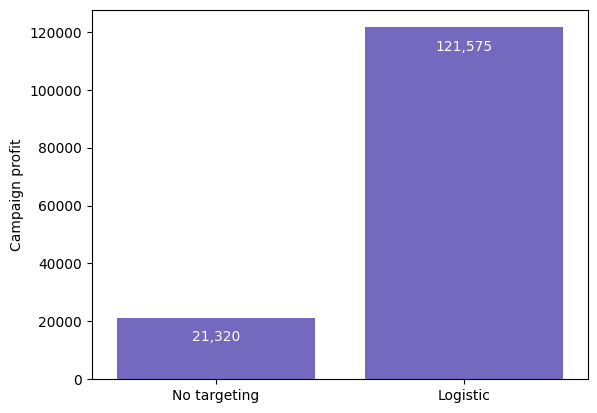

In [ ]:
plt.clf()
fig = sns.barplot(x="name", y="Profit", color="slateblue", data=performance_data)
fig.set(xlabel="", ylabel="Campaign profit")
for index, row in performance_data.iterrows():
    fig.text(
        row.name, row.Profit - 8000, f"{int(row.Profit):,}", color="white", ha="center"
    )
plt.show()

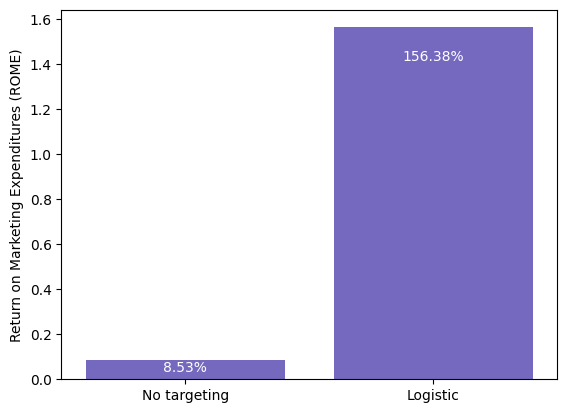

In [ ]:
plt.clf()
fig = sns.barplot(x="name", y="ROME", color="slateblue", data=performance_data)
fig.set(xlabel="", ylabel="Return on Marketing Expenditures (ROME)")
for index, row in performance_data.iterrows():
    adj = rsm.ifelse(index == 0, 0.05, 0.15)
    fig.text(
        row.name,
        row.ROME - adj,
        f"{round((100*row.ROME), 2):,}%",
        color="white",
        ha="center",
    )
plt.show()
